In [302]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [303]:
labels = pd.read_csv(r'D:\Python projects\Machine Learning\Eye Disease prediction\dataset\labels.csv')

In [304]:
labels.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


In [305]:
labels.isnull().sum()

name        0
category    0
type        0
grade       0
dtype: int64

In [306]:
categories = labels.category.values
# categories.tolist()
categories[0]

0

In [307]:
labels.category.value_counts() #Imbalanced Dataset

0    358
1    263
2     91
Name: category, dtype: int64

In [308]:
sum(categories==2)

91

In [309]:
names = labels.name.values
names[:5]

array(['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg'], dtype=object)

In [310]:
img_dir_path = r'D:\Python projects\Machine Learning\Eye Disease prediction\dataset\images'

IMG_SIZE=400
data = []

for img in os.listdir(img_dir_path):
        try:
            img_array = cv2.imread(os.path.join(img_dir_path, img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

            index = np.where(names==img)
            cat = categories[index]
            data.append([new_array,cat])
        except:
            pass

In [311]:
data[0][1]

array([0], dtype=int64)

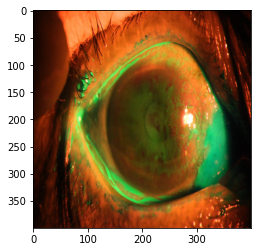

In [312]:
plt.imshow(data[0][0])

In [313]:
data[0][0].shape

(400, 400, 3)

In [314]:
len(data)

712

In [316]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Flatten, Dropout

In [317]:
# using data-augmentation technique for generating new images for category 2

data_augmentation1 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.5),
])

data_augmentation2 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomContrast(0.2)
])

def apply_augmentation(data):
    for i in range(len(data)):
        if data[i][1] == 2:
            data.append([data_augmentation1(data[i][0]),2])
            data.append([data_augmentation2(data[i][0]),2])
            
apply_augmentation(data)

In [318]:
len(data)

894

In [319]:
count = 0
for i in range(len(data)):
        if data[i][1] == 2:
            count +=1
print(count)

273


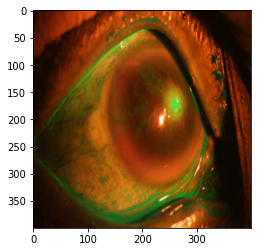

In [320]:
plt.imshow(data[-1][0])

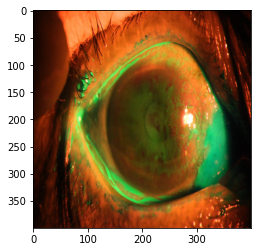

In [321]:
new = cv2.resize(data[0][0],(400,400))
plt.imshow(new)
plt.show()

In [322]:
len(data)

894

In [323]:
import random

random.shuffle(data)

In [324]:
data[0][1][0]

2

In [325]:
def split_train_test(data,X,y):
    for i in range(len(data)):
        X.append(data[i][0])
        y.append(data[i][1])

X = []
y = []
split_train_test(data,X,y)

In [326]:
y[:5]

[array([2], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64)]

In [327]:
X[0]

array([[[60, 13,  5],
        [68, 12,  6],
        [79, 16, 12],
        ...,
        [ 7,  3,  2],
        [ 7,  3,  2],
        [ 5,  1,  0]],

       [[64, 15,  5],
        [71, 14,  5],
        [79, 17, 12],
        ...,
        [ 6,  2,  1],
        [ 7,  3,  2],
        [ 5,  1,  0]],

       [[66, 16,  4],
        [76, 16,  6],
        [80, 18, 11],
        ...,
        [ 7,  3,  2],
        [ 7,  3,  2],
        [ 7,  3,  2]],

       ...,

       [[ 7,  3,  2],
        [ 7,  3,  2],
        [ 7,  4,  1],
        ...,
        [28,  7,  5],
        [31,  8,  6],
        [40,  6,  6]],

       [[ 6,  2,  1],
        [ 7,  3,  2],
        [ 7,  4,  1],
        ...,
        [24,  6,  6],
        [29,  7,  5],
        [44,  9,  5]],

       [[ 6,  2,  1],
        [ 7,  3,  2],
        [ 7,  4,  0],
        ...,
        [26,  6,  8],
        [30,  4,  4],
        [35,  9,  0]]], dtype=uint8)

In [328]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,3)
y = np.array(y).astype(np.float32)

C:\Users\Agni\AppData\Local\Temp/ipykernel_7852/415767177.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y).astype(np.float32)


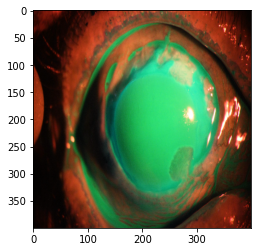

In [329]:
plt.imshow(X[0])

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [332]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [333]:
X_val.shape

(90, 400, 400, 3)

In [334]:
X_train.shape

(715, 400, 400, 3)

In [335]:
X_test.shape

(89, 400, 400, 3)

In [336]:
y_val[:5]

array([0., 1., 1., 2., 1.], dtype=float32)

In [337]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [357]:
input_shape = (0,IMG_SIZE,IMG_SIZE, 3) 

cnn = models.Sequential([
    
  resize_and_rescale,  
  layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
    
  layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),

    
  layers.Flatten(),
  layers.Dense(30, activation='relu'),

  layers.Dense(3, activation='softmax')
])

cnn.build(input_shape=input_shape)

In [358]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [359]:
cnn.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_62 (Sequential)  (None, 400, 400, 3)       0         
                                                                 
 conv2d_103 (Conv2D)         (0, 398, 398, 32)         896       
                                                                 
 max_pooling2d_103 (MaxPooli  (0, 199, 199, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (0, 197, 197, 64)         18496     
                                                                 
 max_pooling2d_104 (MaxPooli  (0, 98, 98, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_81 (Dropout)        (0, 98, 98, 64)         

In [360]:
history = cnn.fit(X_train,y_train, epochs=20, validation_data=(X_val,y_val))

Epoch 1/20
23/23 [==============================] - 83s 4s/step - loss: 1.1600 - accuracy: 0.4448 - val_loss: 0.9567 - val_accuracy: 0.6111
Epoch 2/20
23/23 [==============================] - 84s 4s/step - loss: 0.9166 - accuracy: 0.5524 - val_loss: 0.9404 - val_accuracy: 0.5222
Epoch 3/20
23/23 [==============================] - 82s 4s/step - loss: 0.8186 - accuracy: 0.6112 - val_loss: 0.8526 - val_accuracy: 0.6222
Epoch 4/20
23/23 [==============================] - 79s 3s/step - loss: 0.7185 - accuracy: 0.6867 - val_loss: 0.7948 - val_accuracy: 0.7000
Epoch 5/20
23/23 [==============================] - 76s 3s/step - loss: 0.5921 - accuracy: 0.7650 - val_loss: 0.6743 - val_accuracy: 0.7444
Epoch 6/20
23/23 [==============================] - 76s 3s/step - loss: 0.4026 - accuracy: 0.8587 - val_loss: 0.8212 - val_accuracy: 0.6778
Epoch 7/20
23/23 [==============================] - 76s 3s/step - loss: 0.3130 - accuracy: 0.9021 - val_loss: 0.6620 - val_accuracy: 0.7444
Epoch 8/20
23/23 [==

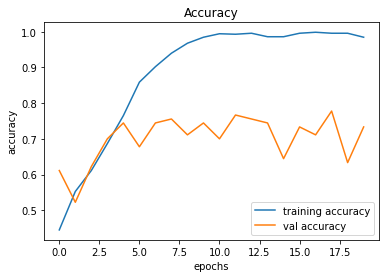

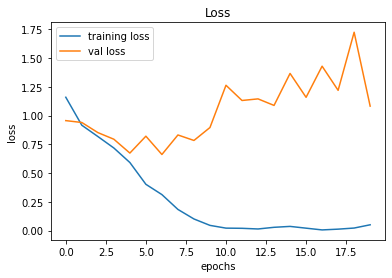

In [361]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [362]:
cnn.evaluate(X_test,y_test)

3/3 [==============================] - 3s 785ms/step - loss: 1.9381 - accuracy: 0.6742


[1.938113808631897, 0.6741573214530945]

In [363]:
prediction = cnn.predict(X_test)
prediction[:5]

array([[1.9953845e-01, 1.0546109e-03, 7.9940695e-01],
       [9.9988210e-01, 3.9090795e-05, 7.8762212e-05],
       [8.3462489e-01, 2.7321768e-03, 1.6264296e-01],
       [9.9569368e-01, 4.2845146e-03, 2.1676147e-05],
       [4.0528215e-07, 9.9999905e-01, 6.3647991e-07]], dtype=float32)

In [364]:
predicted = [np.argmax(i) for i in prediction]
predicted[:5]

[2, 0, 0, 0, 1]

In [365]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(33.0, 0.5, 'Truth')

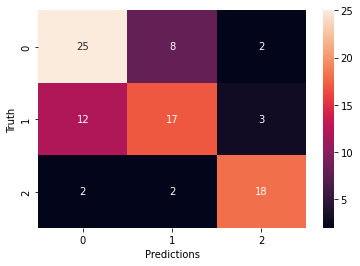

In [366]:
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")